<a href="https://colab.research.google.com/github/AlexErmakov77/ML-Python/blob/main/5_1_Pandas_advanced_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 
*   [Полный User Guide по библиотеке pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Куча полезных рецептов и хороших практик](https://pandas.pydata.org/docs/user_guide/cookbook.html)

Данные iris.csv можно скачать отсюда https://drive.google.com/file/d/1fjyopp9FZ-g6KIsIE8vPX2r62A43h2XI/view?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris[(iris['variety']=='Setosa') & (iris['sepal.length']>5) & (iris['sepal.width']>4)]

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,1.5,0.4,Setosa
32,5.2,4.1,1.5,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa


In [ ]:
iris_1 = iris[(iris['variety']=='Setosa')]

In [ ]:
iris['variety'].drop_duplicates()

0          Setosa
50     Versicolor
100     Virginica
Name: variety, dtype: object

In [ ]:
iris['petal.length'].max()

6.9

In [ ]:
iris[(iris['variety']=='Virginica') & (iris['petal.length']==iris['petal.length'].max())]

,sepal.length,sepal.width,petal.length,petal.width,variety
118,7.7,2.6,6.9,2.3,Virginica


In [ ]:
iris['petal.length'].std()

1.7652982332594667

In [ ]:
iris['petal.length'].var()

3.1162778523489942

## Лямбда-функции

[Хороший материал про лямбда-функции](https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python)

In [ ]:
def f(x):
  return x ** 2

In [ ]:
f(-6), f(2), f(0)

(36, 4, 0)

In [ ]:
f = lambda x: 0 if x < 0 else x ** 2

In [ ]:
f(-6), f(2), f(0)

(0, 4, 0)

In [ ]:
L = [1, 2, 2, 3, 4]

list(map(lambda x: x**2, L))

[1, 4, 4, 9, 16]

In [ ]:
set(map(lambda x: x**2, L))

{1, 4, 9, 16}

In [ ]:
L = [[1, 2, 3], [4, 5, 6], [-1, 4, 5]]

In [ ]:
list(map(lambda l: list(map(lambda x: x**2, l)), L))

[[1, 4, 9], [16, 25, 36], [1, 16, 25]]

## Pandas
В pandas существует два основных объекта: pandas Series и pandas DataFrame. Первая это по сути асбтракция над одномерным массивом данных с дополнительными метаданными, а вторая абстракция это по сути "таблица", состоящая из наборов pandas Series.

### Создание объекта
Начнем с pd.Series. Также, как и для numpy массива мы можем задать тип данных. Доступны все те же типы данных, что и в numpy + есть возможность конвертировать одни типы данных в другие с помощью astype + можно указывать [свои функции](https://pbpython.com/pandas_dtypes.html) для преобразования.

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers') # pd.Series
s

0    1
1    2
2    3
Name: numbers, dtype: int32

Обратите внимание на колонку слева, это индекс, и если не указано обратное, он создается автоматически. Индексы мы будем встречать как для pd.Series, так и для pd.DataFrame. Что же он дает? Аналогия здесь такая же, что с телефонным справочником. Индексы позволяют более логично категоризовать информацию, а также более оптимально делать некоторые операции над сериями (pd.Series) и датафреймами (pd.DataFrame). Вкратце, можно отметить, что индексы
1. Идентифицируют данные (т.е. предоставляют метаданные) с помощью известных индикаторов, важных для анализа, визуализации и отображения в интерактивной консоли
2. Включают автоматическое и явное выравнивание данных.
3. Позволяют интуитивно получать и настраивать подмножества набора данных.

Помимо этого обратите внимание, что у серии также есть имя. Это полезно, когда нам нужно вставить новую колонку в DataFrame без явного указания имени.

Следующим образом мы можем задать произвольный индекс, теперь наши записи идентифицируют буквы a b c

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers', index=['a', 'b', 'c'])
s

a    1
b    2
c    3
Name: numbers, dtype: int32

Помимо индекса (свойства s.index) также сохраняется сквозняется целочисленная индексация.

Ниже выборка просто по целочисленному индексу (сквозному), как будто мы работаем с обычным списком

In [ ]:
s['b']

2

In [ ]:
s[2]

3

Метод доступа .loc позволяет делать выборку именно по индексу.
Обратите внимание, что здесь используются именно квадратные скобки. Скорее всего так сделано, чтобы такая выборка была похоже на выборку из обычного списка.

In [ ]:
s.loc['b']

2

Посмотреть отдельно на индекс можно с помощью свойства .index

In [ ]:
s

a    1
b    2
c    3
Name: numbers, dtype: int32

In [ ]:
s.index

Index(['a', 'b', 'c'], dtype='object')

Создадим pandas DataFrame из случайной numpy матрицы

In [ ]:
m

array([[0.64738307, 0.04870257, 0.5446089 ],
       [0.77353866, 0.01450875, 0.44887038],
       [0.99852851, 0.89911423, 0.75783526],
       [0.03496281, 0.16562396, 0.77969052],
       [0.29084283, 0.62002678, 0.39086647],
       [0.61785811, 0.43415485, 0.63165657],
       [0.43913597, 0.17389062, 0.44632033],
       [0.53779321, 0.37984544, 0.20032831],
       [0.53272615, 0.93793332, 0.9258747 ],
       [0.62682627, 0.94397624, 0.16470359]])

In [ ]:
m = np.random.rand(10,3)
df = pd.DataFrame(m)
df

,0,1,2
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


Мы видим строковый индекс, который был создан автоматически, а также колоночный (или просто колонки), которые также были заданы автоматически. У нас получился не совсем привычный вид таблицы, давайте зададим колонкам более понятные имена.

In [ ]:
df = pd.DataFrame(data=m, columns=['first', 'second', 'third'],)
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


В pandas DataFrame выборка квадратными скобками происходит по колонкам

In [ ]:
df['first']

0    0.647383
1    0.773539
2    0.998529
3    0.034963
4    0.290843
5    0.617858
6    0.439136
7    0.537793
8    0.532726
9    0.626826
Name: first, dtype: float64

In [ ]:
type(df['first'])

pandas.core.series.Series

In [ ]:
df[0] # такой колонки нет, будет ошибка

KeyError: ignored

Но ВНЕЗАПНО, если мы попробуем применить слайсинг как в обычных массивах numpy или списках, выборка будет происходить по строкам. Эта та особенность, которую мы вынуждены просто запомнить. Выборка при этом происходит по целочисленной сквозной индексации (0,1,2,3,4,...).

In [ ]:
df['first'][:3]

0    0.647383
1    0.773539
2    0.998529
Name: first, dtype: float64

In [ ]:
df[:2]

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870


In [ ]:
df.head()

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float64
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


Есть удобный способ инициализировать новый DataFrame с помощью словаря. Ключи станут названиями колонок, а значения по ключам столбцами.

In [ ]:
# pd.DataFrame через словарь
d = {
    'Name': ['Eugene', 'Alexey', 'Vladimir', 'Elena'],
    'Age': [24, 25, 30, 40]
}
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,Name,Age
a,Eugene,24
b,Alexey,25
c,Vladimir,30
d,Elena,40


### Просмотр 

По умолчанию colab notebook (или jupyter notebook) будет "обрезать" отображение табличек, так как если там много строк, они могут занимать много места, и привести ваш браузер в замешательство, а компьютер в полный аут.

[Материал по визуализации табличек](https://habr.com/ru/post/521894/)

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
pd.DataFrame(np.random.rand(100,2)) # так будет пропущено несколько строчек в целях экономии места

,0,1
0,0.576624,0.027091
1,0.792765,0.797403
2,0.131067,0.630055
3,0.634371,0.485238
4,0.038433,0.759506
...,...,...
95,0.611967,0.800765
96,0.686712,0.221825
97,0.141030,0.406531
98,0.787887,0.970593


In [ ]:
print(pd.DataFrame(np.random.rand(100,2)))

           0         1
0   0.553361  0.467172
1   0.276617  0.429596
2   0.729492  0.095592
3   0.388538  0.010952
4   0.660398  0.143789
..       ...       ...
95  0.475384  0.678457
96  0.181185  0.544672
97  0.193821  0.253791
98  0.380562  0.114104
99  0.921607  0.136160

[100 rows x 2 columns]


Впрочем, вряд ли вам понадобится отсматривать, скажем, 100000 строк какой-нибудь таблицы вручную. Как правило, нам достаточно посмотреть первые несколько строк таблицы, чтобы понять что там находится, и правильно ли мы прочитали нашу таблицу из файла.

In [ ]:
df.head(2) # покажем первые две строки датафрейма

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870


In [ ]:
df.tail(2) # последние две строчки с конца

,first,second,third
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


Мы можем отдельно посмотреть строковый индекс и колонки с помощью соответствующих свойств объекта

In [ ]:
df = pd.DataFrame(data=m)
df

,0,1,2
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.columns = ['first', 'second', 'third']

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
df.columns

Index(['first', 'second', 'third'], dtype='object')

In [ ]:
df.columns[1]

'second'

Узнать форму нашей таблицы

In [ ]:
df.shape

(10, 3)

In [ ]:
df.shape[0]

10

In [ ]:
df.shape[1]

3

Посмотреть типы данных

In [ ]:
df.dtypes

first     float64
second    float64
third     float64
dtype: object

И менять их с помощью метода astype. Обратите внимание, что мы можем передать целый словарь в котором ключи это названия колонок, а значения по ключу это тип данных к которому мы хотим преобразовать соответствующую колонку.

In [ ]:
df.astype({'first': np.float32}).dtypes

first     float32
second    float64
third     float64
dtype: object

Мы можем отказаться от всех метаданных и перейти к numpy матрице, чтобы работать с ней с помощью методов из библиотеки numpy

In [ ]:
df.to_numpy()

array([[0.64738307, 0.04870257, 0.5446089 ],
       [0.77353866, 0.01450875, 0.44887038],
       [0.99852851, 0.89911423, 0.75783526],
       [0.03496281, 0.16562396, 0.77969052],
       [0.29084283, 0.62002678, 0.39086647],
       [0.61785811, 0.43415485, 0.63165657],
       [0.43913597, 0.17389062, 0.44632033],
       [0.53779321, 0.37984544, 0.20032831],
       [0.53272615, 0.93793332, 0.9258747 ],
       [0.62682627, 0.94397624, 0.16470359]])

Крайне полезен метод .describe(), который выводит нам дескриптивную статистику по нашему датафрейму.

In [ ]:
df.describe()

,first,second,third
count,10.000000,10.000000,10.000000
mean,0.549960,0.461778,0.529076
std,0.261683,0.368825,0.248680
min,0.034963,0.014509,0.164704
25%,0.462534,0.167691,0.404730
50%,0.577826,0.407000,0.496740
75%,0.642244,0.829342,0.726291
max,0.998529,0.943976,0.925875


А в методе info мы можем сразу проверить наличие пропусков (графа Non-Null Count), а также посмотреть какой объем памяти занимает наша табличка (чем меньше, тем, конечно, лучше).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float64
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


In [ ]:
df.astype({'first': np.float32}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float32
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float32(1), float64(2)
memory usage: 328.0 bytes


По большому счету колонки это тот же индекс, только по горизонтальной оси (axis = 1). Строковый и столбцовый индексы могут заменять друг друга, давайте продемонстрируем это с помощью операции транспонирования.

Кстати, ниже напоминание об осях из прошлой лекции.

![axes](https://railsware.com/blog/wp-content/uploads/2018/11/data-frame-axes.png)

![axes](https://i.stack.imgur.com/FzimB.png)

In [ ]:
df = df.head(10)

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


Мы можем сортировать строки таблицы по значениям колонок. Обратите внимание, что индекс остался прежним.

In [ ]:
df.sort_values('first', ascending=True) # ascending=False по убыванию

,first,second,third
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
6,0.439136,0.173891,0.446320
8,0.532726,0.937933,0.925875
7,0.537793,0.379845,0.200328
5,0.617858,0.434155,0.631657
9,0.626826,0.943976,0.164704
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835


In [ ]:
df.sort_values(['first', 'second'], ascending=[True, False])

,first,second,third
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
6,0.439136,0.173891,0.446320
8,0.532726,0.937933,0.925875
7,0.537793,0.379845,0.200328
5,0.617858,0.434155,0.631657
9,0.626826,0.943976,0.164704
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835


А можем сортировать именно индекс.

In [ ]:
df_T = df.T

In [ ]:
df_T

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


In [ ]:
df_T.sort_index(axis=0)

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


In [ ]:
df.T.sort_index(axis=1, ascending=False)

,9,8,7,6,5,4,3,2,1,0
first,0.626826,0.532726,0.537793,0.439136,0.617858,0.290843,0.034963,0.998529,0.773539,0.647383
second,0.943976,0.937933,0.379845,0.173891,0.434155,0.620027,0.165624,0.899114,0.014509,0.048703
third,0.164704,0.925875,0.200328,0.446320,0.631657,0.390866,0.779691,0.757835,0.448870,0.544609


In [ ]:
df1 = pd.DataFrame({
    'date' : ['2020-01-01', '2020-02-01', '2020-03-01'],
    'usd' : [1, 2, 3],
    'rur' : [4, 8, 12]
})
df1

,date,usd,rur
0,2020-01-01,1,4
1,2020-02-01,2,8
2,2020-03-01,3,12


In [ ]:
df1 = df1.astype({'date':np.datetime64})

In [ ]:
df1

,date,usd,rur
0,2020-01-01,1,4
1,2020-02-01,2,8
2,2020-03-01,3,12


In [ ]:
df1.dtypes

date    datetime64[ns]
usd              int64
rur              int64
dtype: object

In [ ]:
df1.set_index('date', inplace=True)

In [ ]:
df1

,usd,rur
date,,
2020-01-01,1,4
2020-02-01,2,8
2020-03-01,3,12


In [ ]:
import matplotlib.pyplot as plt

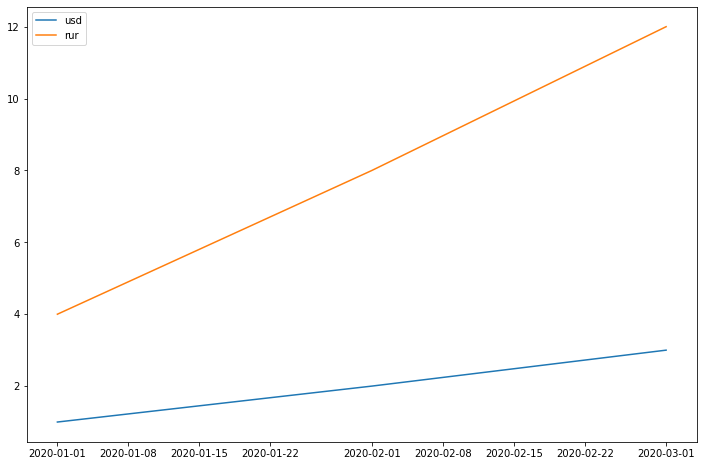

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df1.index, df1['usd'], label='usd')
plt.plot(df1.index, df1['rur'], label='rur')
plt.legend()
plt.show()

In [ ]:
df1.loc['2020-02-01', 'rur']

8

### Выборка
Подробная информация по выборкам данных представлена [тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

#### Квадратные скобки
Как уже отмечалось выше, для датафреймов выборка происходит по столбцам.

In [ ]:
df['third']

0    0.544609
1    0.448870
2    0.757835
3    0.779691
4    0.390866
5    0.631657
6    0.446320
7    0.200328
8    0.925875
9    0.164704
Name: third, dtype: float64

In [ ]:
df[['third', 'first']]

,third,first
0,0.544609,0.647383
1,0.448870,0.773539
2,0.757835,0.998529
3,0.779691,0.034963
4,0.390866,0.290843
5,0.631657,0.617858
6,0.446320,0.439136
7,0.200328,0.537793
8,0.925875,0.532726
9,0.164704,0.626826


In [ ]:
df[1:4] # слайсинг по сквозному целочисленному индексу как в массиве

,first,second,third
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691


#### Выборка по метке (лейблу)
Добавим новый столбец в нашу таблицу и сделаем его новым индексом с помощью метода .set_index()

In [ ]:
df = pd.DataFrame(np.random.rand(5, 3))
df

,0,1,2
0,0.375435,0.011910,0.212827
1,0.374484,0.973505,0.936041
2,0.010015,0.086145,0.208148
3,0.018985,0.897052,0.195056
4,0.583250,0.922223,0.175678


In [ ]:
df['new_index'] = pd.Series(['a', 'b', 'e', 'c', 'g'])
df

,0,1,2,new_index
0,0.375435,0.011910,0.212827,a
1,0.374484,0.973505,0.936041,b
2,0.010015,0.086145,0.208148,e
3,0.018985,0.897052,0.195056,c
4,0.583250,0.922223,0.175678,g


In [ ]:
# df['test_col'] = [[round(np.random.rand(), 3) for i in range(3)] for i in range(df.shape[0])]
# df

,0,1,2,new_index,test_col
0,0.117958,0.256426,0.174802,a,"[0.93, 0.829, 0.538]"
1,0.291829,0.026689,0.041560,b,"[0.38, 0.416, 0.27]"
2,0.299317,0.689872,0.813067,e,"[0.417, 0.947, 0.415]"
3,0.801704,0.959947,0.676425,c,"[0.075, 0.587, 0.369]"
4,0.746120,0.994693,0.966337,g,"[0.678, 0.808, 0.212]"


In [ ]:
df = df.set_index('new_index')
df

,0,1,2
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


Теперь с помощью .loc мы можем производить навигацию по этому индексу

In [ ]:
df.loc['b']

0    0.374484
1    0.973505
2    0.936041
Name: b, dtype: float64

И даже использовать диапазоны (слайсы) по индексу

In [ ]:
df.loc['b':'c']

,0,1,2
new_index,,,
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056


Через запятую мы можем указать также и фильтр по столбцам

In [ ]:
df

,0,1,2
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


In [ ]:
df.columns = ['first', 'second', 'third']

In [ ]:
df[['first', 'second']]

,first,second
new_index,,
a,0.375435,0.011910
b,0.374484,0.973505
e,0.010015,0.086145
c,0.018985,0.897052
g,0.583250,0.922223


In [ ]:
df.loc[:'e', ['second', 'third']]

,second,third
new_index,,
a,0.011910,0.212827
b,0.973505,0.936041
e,0.086145,0.208148


#### Выборка по позиции в таблице
Сохраняется сквозная целочисленная индексация, и она доступна с помощью метода .iloc. Скобки также квадратные

In [ ]:
df

,first,second,third
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


In [ ]:
df.loc[1:3]

TypeError: ignored

In [ ]:
df.iloc[1:3]

,first,second,third
new_index,,,
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148


Происходит выборка именно по **номеру** строки и **номеру** столбца (начиная с нуля)

In [ ]:
df.iloc[1:3, [0, 2]]

,first,third
new_index,,
b,0.374484,0.936041
e,0.010015,0.208148


### Чтение и запись данных

В pandas присутствует огромное кол-во возможностей для чтения записи данных.

Например, в методе pd.read_csv доступны специфичные опции для формата (например, разделитель колонок sep), но и также можно, например, дополнить список значений, которые pandas по умолчанию считает пропусками, задав явно параметр na_values.

Более подробную информацию про чтение запись данных можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris = pd.read_csv('iris.csv', header='infer', sep=',')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
pd.read_ # доступно очень большое кол-во форматов для чтения

In [ ]:
# запись to_csv() и другие

In [ ]:
iris.to_csv('iris_test.csv', header=True, index=False) # сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем

In [ ]:
!ls

'iris (1).csv'	 iris.csv   iris_test.csv   sample_data


In [ ]:
iris.to_excel('iris_test.xlsx', header=True, index=False) # сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем

In [ ]:
!ls

'iris (1).csv'	 iris.csv   iris_test.csv   iris_test.xlsx   sample_data


Загрузим набор данных iris.csv, и потренируемся делать выборки на нем.

In [ ]:
import numpy as np
import pandas as pd

iris = pd.read_csv('iris.csv', header='infer')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.shape

(150, 5)

##### Задачи на выборку данных
1. выведите первые 4 строки и первые 2 столбца с помощью метода .iloc
2. выведите только колонки sepal.length и petal.length с помощью loc и/или квадратных скобок
3. сделайте индексом колонку variety с помощью метода .set_index(), и выберите с помощью .loc только вид 'Setosa'

#### Выборка по маске
Также как и в numpy присутствует возможность делать выборки по маске. Но здесь механизм несколько отличается. Если в numpy мы получали матрицу из True и False, и у каждому элементу было сопоставлено значение True (брать в выборку) или False (не брать в выборку), то в pandas маска это pandas Series **с такой же индексацией** что и исходный датафрейм или серия, состоящий из значений True или False. Т.е мы указываем какие строчки идут в результирующую выборку, а какие нет.

In [ ]:
iris[(iris['sepal.length'] > 5.0) | (iris['sepal.width'] <= 3.0)]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris['sepal.width'] <= 3.0

0      False
1       True
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Name: sepal.width, Length: 150, dtype: bool

In [ ]:
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [ ]:
# получаем маску в которой у каждого индекса (!!!) указано оставлять его в наборе данных или нет
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

Конечно, мы можем выстраивать условия в логические цепочки

In [ ]:
iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


Мы можем даже перемешать значения, но выборка все равно останется той же за счет соответствия по индексу!

In [ ]:
A = iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
A.shape

(71, 5)

In [ ]:
A

,sepal.length,sepal.width,petal.length,petal.width,variety
98,5.1,2.5,3.0,1.1,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
84,5.4,3.0,4.5,1.5,Versicolor
90,5.5,2.6,4.4,1.2,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
...,...,...,...,...,...
130,7.4,2.8,6.1,1.9,Virginica
105,7.6,3.0,6.6,2.1,Virginica
122,7.7,2.8,6.7,2.0,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [ ]:
A.reset_index(inplace=True, drop=True)

In [ ]:
A

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,2.5,3.0,1.1,Versicolor
1,5.2,2.7,3.9,1.4,Versicolor
2,5.4,3.0,4.5,1.5,Versicolor
3,5.5,2.6,4.4,1.2,Versicolor
4,5.5,2.3,4.0,1.3,Versicolor
...,...,...,...,...,...
66,7.4,2.8,6.1,1.9,Virginica
67,7.6,3.0,6.6,2.1,Virginica
68,7.7,2.8,6.7,2.0,Virginica
69,7.7,2.6,6.9,2.3,Virginica


In [ ]:
# получим уникальные значения индексов в каждой выборке
# если множество ключей в первом случае совпадает со множеством во втором случае, то 
# в обоих случаях мы сделали одинаковую выборку
set(iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index) \
 - set(iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


set()

Для того, чтобы сделать фильтрацию по значениям в колонке, используйте метод .isin()

In [ ]:
iris['variety'].isin(['Setosa', 'Virginica']) # проверка по множеству

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: variety, Length: 150, dtype: bool

In [ ]:
iris[iris['variety'].isin(['Setosa', 'Virginica'])]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Вставка значений
Вставку значений можно производить методами доступа .loc и .iloc, а также методом .at. Разница в том, что .loc и .iloc чуть более универсальны, и позволяют изменить сразу целый диапазон, при этом важно соблюсти размерности вставляемых данных. .at в свою очередь дает нам точечную вставку "на место", и лучше подходит с точки зрения чтения кода.

In [ ]:
df = pd.DataFrame(np.random.rand(6,3), 
                  index=['a','b','c','d','e','f'], 
                  columns=['first', 'second', 'third'])
df

,first,second,third
a,0.456229,0.080704,0.306174
b,0.430670,0.894766,0.139587
c,0.064685,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['b','first'] = 1.0
df

,first,second,third
a,0.456229,0.080704,0.306174
b,1.000000,0.894766,0.139587
c,0.064685,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['a':'c', 'first'] = [0.5, 1.5, 2.0]
df

,first,second,third
a,0.500000,0.080704,0.306174
b,1.500000,0.894766,0.139587
c,2.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.iloc['d', ['first', 'second', 'third']] = 30000
df

IndexError: ignored

In [ ]:
df.iloc['d', [0, 1, 2]] = 30000
df

IndexError: ignored

In [ ]:
df.iloc[3, [0, 1, 2]] = 30000
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['e', 'second'] = 100
df

,first,second,third
a,0.500000,0.080704,0.306174
b,1.500000,0.894766,0.139587
c,2.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['a':'c', 'first'] = [500, 1500, 2000]
df

,first,second,third
a,500.000000,0.080704,0.306174
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['a', ['first', 'third', 'second']] = [500, 1500, 2000]
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


### Пропущенные значения
По умолчанию не участвуют в вычислениях, и чаще всего на месте пропусков можно встретить значение np.nan (Not a Number), либо None (для нечисловых типов)

In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
# сделаем специально несколько пропущенных значений
df.at['e', 'second'] = np.nan
df.at['e', 'third'] = np.nan
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


Метод .isna() возвращает нам карту с пропусками. Пропуск там, где значение True.

In [ ]:
df.isna()

,first,second,third
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False
e,False,True,True
f,False,False,False


Напоминаю, что в принципе количественную информацию о пропусках можно получить с помощью метода .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   6 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float64(3)
memory usage: 352.0+ bytes


Для удаления пропусков используется метод .dropna().

По умолчанию .dropna() удалит те строки в которых есть хотя бы один пропуск в строке.

In [ ]:
df.dropna()

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
f,0.888645,0.526673,0.444615


А с помощью транспонирования можно удалять целые столбцы

In [ ]:
df.T.dropna().T

,first
a,500.000000
b,1500.000000
c,2000.000000
d,30000.000000
e,0.595290
f,0.888645


Или использовать параметр axis=1

In [ ]:
df.dropna(axis=1)

,first
a,500.000000
b,1500.000000
c,2000.000000
d,30000.000000
e,0.595290
f,0.888645


In [ ]:
df.dropna(axis=0)

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
f,0.888645,0.526673,0.444615


Но все же часто нам все-таки интересны данные с пропусками. Для работы с ними можно использовать метод .fillna()

Вот так мы заполним все пропуски одним и тем же значением

In [ ]:
df.fillna(0)

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,0.000000,0.000000
f,0.888645,0.526673,0.444615


Но обычно мы все же хотим заполнять разные столбцы разными значениями

In [ ]:
df.fillna({'second': 0, 'third': 1000})

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,0.000000,1000.000000
f,0.888645,0.526673,0.444615


Есть и более продвинутые методы заполнения, сделаем несколько пропусков подряд

In [ ]:
df.at['d', 'second'] = np.nan
df.at['d', 'third'] = np.nan
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


Метод bfill заполняет серию пропусков последним корректным (non Null) значением, итерируясь по таблице с конца.

In [ ]:
df.fillna(method='bfill')

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.526673,0.444615
e,0.595290,0.526673,0.444615
f,0.888645,0.526673,0.444615


Метод ffill делает то же самое, но итерация происходит с начала таблицы

In [ ]:
df.fillna(method='ffill')

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.536307,0.568368
e,0.595290,0.536307,0.568368
f,0.888645,0.526673,0.444615


In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
# df['second'] = df['second'].fillna(0) # работает медленно

a    2000.000000
b       0.894766
c       0.536307
d       0.000000
e       0.000000
f       0.526673
Name: second, dtype: float64

In [ ]:
df.fillna({'second': 0})

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.000000,NaN
e,0.595290,0.000000,NaN
f,0.888645,0.526673,0.444615


bfill и ffill особенно полезны при заполнении пропусков во временном ряду. Более подробно данный функционал описан [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).




### Статистики
Конечно, в pandas реализовано куча методов для подсчета различных статистик. 
Полный список методов можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) 

In [ ]:
# mean, std, var, value_counts, df +- series

Вот так мы можем посчитать средние значения для всех колонок сразу

In [ ]:
df.mean()

first     5666.913989
second     500.489436
third      375.288142
dtype: float64

А так посчитать среднее лишь для одной колонки

In [ ]:
df['first'].mean()

5666.913989053872

То же для [стандартного отклонения](https://berg.com.ua/indicators-overlays/stdev/#:~:text=%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D0%B2%D1%8B%D1%80%D0%B0%D0%B7%D0%B8%D1%82%D1%8C%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%BE%D0%B9,%D0%BD%D0%B0%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B2%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B5.)

In [ ]:
df.std() # стандартное

first     11948.359856
second      999.673724
third       749.807927
dtype: float64

Или [дисперсии](https://ru.qwe.wiki/wiki/Variance)

In [ ]:
df.var() # дисперсию

first     1.427633e+08
second    9.993476e+05
third     5.622119e+05
dtype: float64

А с помощью .value_counts() можно посчитать кол-во вхождений уникальных значений

In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['b', 'second'] = 2000
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,2000.000000,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
df['second'].value_counts()

2000.000000    2
0.536307       1
0.526673       1
Name: second, dtype: int64

In [ ]:
df['second'].count()

4

In [ ]:
df['second'].isna().sum()

2

In [ ]:
df['second'].sum()

4001.062980282184

### Применение функций к данным (apply)
И все же иногда в pandas требуются новые функции со своей логикой обработки. Тогда на помощью приходит метод .apply

Он работает следующим образом. Мы передаем первым аргументом функцию, которая отвечает за логику, а вторым передаем axis, т.е мы указываем производить обработку по колонкам или по строкам.

В самой функции, задающей логику, нужно не забыть вернуть строку или столбец обратно в таблицу (return).

Полное описание функции доступно [тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
df.iloc[0, :].to_frame().T

,first,second,third
a,500.0,2000.0,1500.0


In [ ]:
df.iloc[0, :]

first      500.0
second    2000.0
third     1500.0
Name: a, dtype: float64

In [ ]:
def my_function(r): 
  r['first'] = r['first']**2
  r['second'] = r['second'] - 1
  return r

print("begin")
df.apply(my_function, axis=1) # тогда в my_function будут отправляться строки, в параметр r
# for *итерация по строчкам*
#.  применить к строке функцию my_function и перезаписать строчку

begin


,first,second,third
a,2.500000e+05,1999.000000,1500.000000
b,2.250000e+06,1999.000000,0.139587
c,4.000000e+06,-0.463693,0.568368
d,9.000000e+08,NaN,NaN
e,3.543698e-01,NaN,NaN
f,7.896894e-01,-0.473327,0.444615


In [ ]:
df.second

a    1999.000000
b    1999.000000
c      -0.463693
d            NaN
e            NaN
f      -0.473327
Name: second, dtype: float64

In [ ]:
df.rename(columns={'second':'second column'})['second column']

a    1999.000000
b    1999.000000
c      -0.463693
d            NaN
e            NaN
f      -0.473327
Name: second column, dtype: float64

In [ ]:
df['first'].name

'first'

In [ ]:
def my_function(c):
  if c.name == 'first':
    c = c**2
  if c.name == 'second':
    c = c - 1
  return c

print("begin")
df.apply(my_function, axis=0) # тогда в my_function будут отправляться столбцы, в параметр c
# for *итерация по колонкам*
#.  применить к колонке функцию my_function и перезаписать колонку

begin


,first,second,third
a,6.250000e+10,1998.000000,1500.000000
b,5.062500e+12,1998.000000,0.139587
c,1.600000e+13,-1.463693,0.568368
d,8.100000e+17,NaN,NaN
e,1.255779e-01,NaN,NaN
f,6.236093e-01,-1.473327,0.444615


# Занятие 5

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
шкшы

In [ ]:
df = pd.DataFrame(np.random.rand(6,3), 
                  index=['a','b','c','d','e','f'], 
                  columns=['first', 'second', 'third'])
df

,first,second,third
a,0.065707,0.953735,0.203966
b,0.916180,0.881574,0.745571
c,0.446418,0.528544,0.503995
d,0.468753,0.207191,0.410476
e,0.130281,0.247233,0.543684
f,0.472362,0.883387,0.041560


In [ ]:
df.at['d':'e', 'second'] = np.nan
df.at['d':'e', 'third'] = np.nan
df

,first,second,third
a,0.065707,0.953735,0.203966
b,0.916180,0.881574,0.745571
c,0.446418,0.528544,0.503995
d,0.468753,NaN,NaN
e,0.130281,NaN,NaN
f,0.472362,0.883387,0.041560


### Методы для работы со строками
Есть приятная возможность работы с векторизованными копиями функций для стандартного [типа данных str](https://pyprog.pro/python/py/str/str_methods.html). Например, мы можем перевести все строки в верхний регистр или нижний, посчитать кол-во определенных символов и т.д. Если у вас есть объект pandas.Series на который ссылается переменная s, то получить доступ к этим методам можно если вызвать свойство s.str.<название метода для работы со строками>.

[pandas.Series.str](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

[Руководство по работе со строковыми колонками.](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

Зададим еще одну строковую колонку в нашем датафрейме

In [ ]:
df['fourth'] = pd.Series(['abc', 'def', 'xyz dsad', 'dweq', 'dsad', 'dsad'], index=df.index)
df

,first,second,third,fourth
a,0.065707,0.953735,0.203966,abc
b,0.916180,0.881574,0.745571,def
c,0.446418,0.528544,0.503995,xyz dsad
d,0.468753,NaN,NaN,dweq
e,0.130281,NaN,NaN,dsad
f,0.472362,0.883387,0.041560,dsad


Приведем всю колонку к верхнему регистру

In [ ]:
'abc'.upper()

'ABC'

In [ ]:
df['fourth'].str.upper()

a         ABC
b         DEF
c    XYZ DSAD
d        DWEQ
e        DSAD
f        DSAD
Name: fourth, dtype: object

Или разобьем все строкипо определенному символу

In [ ]:
df['fourth'].str.split('d')

a           [abc]
b          [, ef]
c    [xyz , sa, ]
d         [, weq]
e        [, sa, ]
f        [, sa, ]
Name: fourth, dtype: object

Можно также указать вторым аргументом максимальное кол-во разбиений, и создать из полученных массивов новый датафрейм, где в каждую колонку будет записан элемент разбиения (expand=True).

Описание метода [pandas.Series.str.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html )

In [ ]:
"hello world! it's me".split(' ', 1)

['hello', "world! it's me"]

In [ ]:
df['fourth'].str.split('d', 1, expand=True)

,0,1
a,abc,None
b,,ef
c,xyz,sad
d,,weq
e,,sad
f,,sad


### Соединение датафреймов

[Руководство по методам pd.merge, pd.join и pd.concat](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [ ]:
# pd.concat, pd.merge

Рассмотрим применение метода pd.concat для конкатенации (соединения по осям) на основе датафрейма iris.

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


pd.concat принимает на вход последовательность датафреймов или серий для соединения. По умолчанию соединение происходит по axis=0, но, конечно, можно произвести и горизонтальное соединение.

In [ ]:
vertical_concat = pd.concat([iris, iris])
vertical_concat

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Обратите внимание, что индексы не сбрасываются, и теперь мы видим две записи по одному индексу. Чтобы создать новый индекс, необходимо указать параметр ignore_index=True. 

In [ ]:
vertical_concat.loc[110] # индексы не сбрасываются, если нужно сбросить, используем метод reset_index()

,sepal.length,sepal.width,petal.length,petal.width,variety
110,6.5,3.2,5.1,2.0,Virginica
110,6.5,3.2,5.1,2.0,Virginica


Либо сбросить индекс уже после соединения

In [ ]:
vertical_concat.reset_index()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
295,145,6.7,3.0,5.2,2.3,Virginica
296,146,6.3,2.5,5.0,1.9,Virginica
297,147,6.5,3.0,5.2,2.0,Virginica
298,148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
vertical_concat.reset_index().loc[110]

index                 110
sepal.length          6.5
sepal.width           3.2
petal.length          5.1
petal.width             2
variety         Virginica
Name: 110, dtype: object

Аналогично, соединение по горизонтали

In [ ]:
horizontal_concat = pd.concat([iris, iris], axis=1)
horizontal_concat

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica,6.2,3.4,5.4,2.3,Virginica


In [ ]:
horizontal_concat['sepal.length']

,sepal.length,sepal.length
0,5.1,5.1
1,4.9,4.9
2,4.7,4.7
3,4.6,4.6
4,5.0,5.0
...,...,...
145,6.7,6.7
146,6.3,6.3
147,6.5,6.5
148,6.2,6.2


Стоит также отметить важный параметр join, который по умолчанию выставлен в 'outer', но может быть выставлен в 'inner'. Этот параметр указывает как поступить с теми индексами, которых нет в одном из датафреймов, участвующих в соединении.

'outer' объединяет (union) датафреймы.

'inner' оставляет только пересечения по индексу.

См. примеры

In [ ]:
pd.concat([iris.loc[[0, 1, 2, 3, 5, 7, 9], :], iris.loc[[0, 1, 2, 4, 6, 8, 10], :]], join='outer', axis=1)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.concat([iris.loc[[0, 1, 2, 3, 5, 7, 9], :], iris.loc[[0, 1, 2, 4, 6, 8, 10], :]], join='inner', axis=1)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa


In [ ]:
pd.concat([iris, iris[:50]], join='outer', axis=1)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,NaN,NaN,NaN,NaN,NaN
146,6.3,2.5,5.0,1.9,Virginica,NaN,NaN,NaN,NaN,NaN
147,6.5,3.0,5.2,2.0,Virginica,NaN,NaN,NaN,NaN,NaN
148,6.2,3.4,5.4,2.3,Virginica,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.concat([iris, iris[:50]], join='inner', axis=1)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa,4.9,3.1,1.5,0.1,Setosa


In [ ]:
pd.concat([iris, iris[['sepal.length', 'petal.length']]], join='outer', axis=0)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,NaN
146,6.3,NaN,5.0,NaN,NaN
147,6.5,NaN,5.2,NaN,NaN
148,6.2,NaN,5.4,NaN,NaN


In [ ]:
pd.concat([iris, iris[['sepal.length', 'petal.length']]], join='inner', axis=0)

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


#### pd.merge

pandas имеет полнофункциональные, высокопроизводительные операции соединения в памяти, идиоматически очень похожие на реляционные базы данных, такие как SQL.

Вообще говоря, существует 3 типа соединений
1. внутреннее соединение (inner)
2. левое соединение (left), так остаются строки из левой таблицы, а для неизвестных значений правой выставляется значение NaN
3. правое соеденине (т.е right) так остаются строки из правой таблицы, а для неизвестных значений левой выставляется значение NaN
4. внешнее соединение (т.е outer). кобминация из левого и правого соединения

Для запоминания можно вспоользовать вот этой картинкой. Нужно подчеркнуть, что пересечение и объединение происходит в множестве ключей (колонок), по которым происходит соединение. Так, например, для inner join мы оставляем в результирующей выборке подмножество всевозможных попарных комбинаций строк, с условием, что значения в колонках (ключах) по которым происходит соединение, совпадают.

![joins](https://i.stack.imgur.com/VQ5XP.png)

[Сравнение использования с sql join-ами](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)


Мы будем работать с методом pd.merge(), так как он является более универсальным, хотя иногда короче использовать метод pd.join()

In [ ]:
# разберемся на примере задач
import pandas as pd
import numpy as np

df_left = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna', 'Petr'],
    'age': [20, 30, 40, 50]
}, 
index=['a', 'a', 'b', 'e']
# index=['a', 'b', 'c']
)

df_right = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna', 'Vasiliy'],
    'second_name': ['Petrov', 'Ivanov', 'Smirnova', 'Alexandrov']
}, 
index=['a', 'b', 'c', 'b']
# index=['a', 'b', 'c', 'd']
)

In [ ]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40
e,Petr,50


In [ ]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


У pd.merge есть довольно много параметров, увидев которые в первый раз можно немного выпасть в осадок. Давайте разберемся по порядку.

Первые 2 параметра: left и right. Это левый и правый датафрейм (таблицы), которые будут участвовать в соединении.

left_index и right_index принимают значения True или False. Указывают, использовать ли для левой таблицы индекс в качестве ключа и то же самое для правой. Так, вызов pd.merge(left, right, left_index=True, right_index=True) произведет соединение, где будет происходить проверка на равенство индексов в левой и правой таблице

left_on и right_on используются, когда мы хотим произвести соединение не по индексу, а по колонкам, принимают в качестве значения соответственно названия колонок из левой таблицы и из правой, можно передать сразу несколько названий колонок в списке, но кол-во колонок слева и справа должно совпадать. Таким образом pd.merge(left, right, left_on='A', right_on='B') произведет соединение в котором будет происходить проверка на равенство значений в колонке 'A' левой таблицы и колонки 'B' правой таблицы.

Мы можем комбинировать left_index, right_index и left_on, right_on. Например, использовать в левой таблице в качестве ключа индекс, а в правой колонку 'B': pd.merge(left, right, left_index=True, right_on='B').

Если названия колонок для соединения в обеих таблицах совпадают, то вместо передачи идентичных значений в left_on и right_on, можно просто указать параметр on='<название колонки>'.

Параметр how указывает тип соединения, и может принимать значения 'inner' (по умолчанию), 'outer', 'left' и 'right'.

Любопытно также наличие параметра validate, который делает проверку результирующего датафрейма в зависимости от наших ожиданий результата. Принимает следующие значения:
- “one_to_one” или “1:1”: проверяет, что ключи, использованные в соединении уникальны в левой и правой таблице

- “one_to_many” или “1:m”: Проверяет, что ключи уникальны в левой таблице

- “many_to_one” или “m:1”: Проверяет, что ключи уникальны в правой таблице

- “many_to_many” или “m:m”: можно указать, но при этом не происходит никаких проверок. Ключи могут быть неуникальны в обеих таблицах.

#### Задачи на pd.merge
1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
2. соедините строки первой таблицы со второй по индексу (левое соединение)
3. соедините строки первой таблицы со второй по индексу (правое соединение)
4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
5. соедините строки первой таблицы со второй по колонке name (правое соединение)

In [ ]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40
e,Petr,50


In [ ]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [ ]:
# 1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
# если не указываем left_index=True и right_index=True, то соединение происходит по целочисленному сквозному индексу
pd.merge(df_left, df_right, left_index=True, right_index=True, how='inner')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [ ]:
# прочувствуйте разницу
pd.merge(df_left, df_right)

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40
e,Petr,50


In [ ]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [ ]:
# 2. соедините строки первой таблицы со второй по индексу (левое соединение)
pd.merge(df_left, df_right, how='left', left_index=True, right_index=True)

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov
e,Petr,50,NaN,NaN


In [ ]:
# 3. соедините строки первой таблицы со второй по индексу (правое соединение)
pd.merge(df_left, df_right, how='right', left_index=True, right_index=True)

,name_x,age,name_y,second_name
a,Dmitry,20.0,Dmitry,Petrov
a,Sergey,30.0,Dmitry,Petrov
b,Anna,40.0,Sergey,Ivanov
b,Anna,40.0,Vasiliy,Alexandrov
c,NaN,NaN,Anna,Smirnova


In [ ]:
pd.merge(df_left, df_right, how='outer', left_index=True, right_index=True)

,name_x,age,name_y,second_name
a,Dmitry,20.0,Dmitry,Petrov
a,Sergey,30.0,Dmitry,Petrov
b,Anna,40.0,Sergey,Ivanov
b,Anna,40.0,Vasiliy,Alexandrov
c,NaN,NaN,Anna,Smirnova
e,Petr,50.0,NaN,NaN


In [ ]:
# 4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
pd.merge(df_left, df_right, how='inner', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
# 5. соедините строки первой таблицы со второй по колонке name (правое соединение)
pd.merge(df_left, df_right, how='right', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [ ]:
pd.merge(df_left, df_right, how='right', on='name') # если название колонки в левой таблице совподает с названием колонки в правой таблице, 
# то можно опустить параметры left_on и right_on, и использовать просто параметр on.

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [ ]:
df_left = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna', 'Petr'],
    'second_name' : ['Petrov', 'Ivanov', 'Smirnova', 'Alexandrov'],
    'age': [20, 30, 40, 50]
}, 
index=['a', 'a', 'b', 'e']
# index=['a', 'b', 'c']
)

df_right = pd.DataFrame({
    'Name': ['Dmitry', 'Sergey', 'Anna', 'Vasiliy'],
    'Second_name': ['Petrov', 'Ivanov', 'Smirnova', 'Alexandrov'],
    'height': [120, 130, 140, 150]
}, 
index=['a', 'b', 'c', 'b']
# index=['a', 'b', 'c', 'd']
)

In [ ]:
df_left

,name,second_name,age
a,Dmitry,Petrov,20
a,Sergey,Ivanov,30
b,Anna,Smirnova,40
e,Petr,Alexandrov,50


In [ ]:
df_right

,Name,Second_name,height
a,Dmitry,Petrov,120
b,Sergey,Ivanov,130
c,Anna,Smirnova,140
b,Vasiliy,Alexandrov,150


In [ ]:
pd.merge(df_left, df_right, how='outer', left_on=['name', 'second_name'], right_on=['Name', 'Second_name'])

,name,second_name,age,Name,Second_name,height
0,Dmitry,Petrov,20.0,Dmitry,Petrov,120.0
1,Sergey,Ivanov,30.0,Sergey,Ivanov,130.0
2,Anna,Smirnova,40.0,Anna,Smirnova,140.0
3,Petr,Alexandrov,50.0,NaN,NaN,NaN
4,NaN,NaN,NaN,Vasiliy,Alexandrov,150.0


In [ ]:
df_left

,name,second_name,age
a,Dmitry,Petrov,20
a,Sergey,Ivanov,30
b,Anna,Smirnova,40
e,Petr,Alexandrov,50


In [ ]:
df_right

,Name,Second_name,height
a,Dmitry,Petrov,120
b,Sergey,Ivanov,130
c,Anna,Smirnova,140
b,Vasiliy,Alexandrov,150


In [ ]:
pd.concat([df_left, df_right], join='inner', axis=1)

ValueError: ignored

### Группировка
Очень часто нам необходимо подсчитывать различные параметры и строить графики по группам. Для всего этого существует операция groupby в pandas, и она работает по существу также, как и в SQL.

Руководство по [группировке](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) и [еще одно на хабре](https://habr.com/ru/post/501214/).

In [ ]:
# groupby, max, min, describe, agg, apply

Вот так мы можем произвести группировку по колнке variety и посчитать среднее значения в каждой колонке по группам

In [ ]:
iris['petal.length'].mean()

3.7580000000000027

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


Или максимальные

In [ ]:
iris.groupby('variety').max()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.8,4.4,1.9,0.6
Versicolor,7.0,3.4,5.1,1.8
Virginica,7.9,3.8,6.9,2.5


In [ ]:
iris.groupby('variety').max().index

Index(['Setosa', 'Versicolor', 'Virginica'], dtype='object', name='variety')

Или минимальные

In [ ]:
iris.groupby('variety').min()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,4.3,2.3,1.0,0.1
Versicolor,4.9,2.0,3.0,1.0
Virginica,4.9,2.2,4.5,1.4


Иногда необходимо посчитать разные метрики для разных колонок, используйте для этого метод .agg()

In [ ]:
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'], 
    'petal.length': ['mean', 'median'],
    'petal.width': 'max'
    })

sepal.length      petal.length        petal.width        
                    max  min         mean median         max  my_fun
variety                                                             
Setosa              5.8  4.3        1.462   1.50         0.6    1.23
Versicolor          7.0  4.9        4.260   4.35         1.8   66.30
Virginica           7.9  4.9        5.552   5.55         2.5  141.82

In [ ]:
import numpy as np

In [ ]:
def my_fun(col):
  return np.sum(col) * np.min(col)

In [ ]:
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'], 
    'petal.length': ['mean', 'median'],
    'petal.width': [np.max, my_fun]
    })

sepal.length      petal.length        petal.width        
                    max  min         mean median        amax  my_fun
variety                                                             
Setosa              5.8  4.3        1.462   1.50         0.6    1.23
Versicolor          7.0  4.9        4.260   4.35         1.8   66.30
Virginica           7.9  4.9        5.552   5.55         2.5  141.82

In [ ]:
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'], 
    'petal.length': ['mean', 'median'],
    'petal.width': 'max'
    }).columns

MultiIndex([('sepal.length',    'max'),
            ('sepal.length',    'min'),
            ('petal.length',   'mean'),
            ('petal.length', 'median'),
            ( 'petal.width',    'max')],
           )

In [ ]:
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'], 
    'petal.length': ['mean', 'median'],
    'petal.width': 'max'
    })[[('sepal.length',    'max'),
        ('petal.length',    'mean')]]

,sepal.length,petal.length
,max,mean
variety,,
Setosa,5.8,1.462
Versicolor,7.0,4.260
Virginica,7.9,5.552


Есть даже .describe(), но его вывод выглядит несколько громоздко

In [ ]:
iris.groupby('variety').describe()

sepal.length                               ... petal.width                    
                  count   mean       std  min    25%  ...         min  25%  50%  75%  max
variety                                               ...                                
Setosa             50.0  5.006  0.352490  4.3  4.800  ...         0.1  0.2  0.2  0.3  0.6
Versicolor         50.0  5.936  0.516171  4.9  5.600  ...         1.0  1.2  1.3  1.5  1.8
Virginica          50.0  6.588  0.635880  4.9  6.225  ...         1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

Обратите внимание, что после того как мы вызвали метод .groupby(), нам возвращается специальный объект DataFrameGroupBy. Для него есть отдельная страничка с доступными методами. После применения одной из агрегирующих функций мы получаем новый датафрейм с которым мы уже умеем работать.

In [ ]:
type(iris.groupby('variety'))

pandas.core.groupby.generic.DataFrameGroupBy

Для DataFrameGroupBy есть также и метод apply, по своему поведению похожий на apply для DataFrame

In [ ]:
def my_function(gr):
  print(gr)
  return gr

iris.groupby('variety').apply(my_function)

    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
def my_function(gr):
  # смотрю значение колонки varitety в первой строке группы, и в зависимости от этого делаю что-то...
  if gr.iloc[0]['variety'] == 'Setosa':
    gr['sepal.width'] = gr['sepal.width']**2
  if gr.iloc[0]['variety'] == 'Virginica':
    gr['sepal.width'] = gr['sepal.width']**3
  return gr

iris.groupby('variety').apply(my_function)
# для каждой подгруппы:
#   положить подгруппу в переменную gr
#   применить преобразования в my_function
#   преобразованную группу вернуть обратно в таблицу (return)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,12.250,1.4,0.2,Setosa
1,4.9,9.000,1.4,0.2,Setosa
2,4.7,10.240,1.3,0.2,Setosa
3,4.6,9.610,1.5,0.2,Setosa
4,5.0,12.960,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,27.000,5.2,2.3,Virginica
146,6.3,15.625,5.0,1.9,Virginica
147,6.5,27.000,5.2,2.0,Virginica
148,6.2,39.304,5.4,2.3,Virginica


Есть также ряд любопытных методов типа кумулятивной суммы (cumsum) или ранга (rank). Так мы можем присвоить в каждой группе порядковые значения объектам в зависимости от одной из колонок. Бывает очень полезно, например, если вам нужно проследить эволюцию какого-нибудь из параметров в зависимости от номера события во времени.

In [ ]:
iris['sepal.length.rank'] = iris.groupby('variety')['sepal.length'].rank(method='dense')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.rank
0,5.1,3.5,1.4,0.2,Setosa,9.0
1,4.9,3.0,1.4,0.2,Setosa,7.0
2,4.7,3.2,1.3,0.2,Setosa,5.0
3,4.6,3.1,1.5,0.2,Setosa,4.0
4,5.0,3.6,1.4,0.2,Setosa,8.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,12.0
146,6.3,2.5,5.0,1.9,Virginica,9.0
147,6.5,3.0,5.2,2.0,Virginica,11.0
148,6.2,3.4,5.4,2.3,Virginica,8.0


In [ ]:
iris[iris['variety']=='Setosa'].sort_values('sepal.length')

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.rank
13,4.3,3.0,1.1,0.1,Setosa,1.0
8,4.4,2.9,1.4,0.2,Setosa,2.0
38,4.4,3.0,1.3,0.2,Setosa,2.0
42,4.4,3.2,1.3,0.2,Setosa,2.0
41,4.5,2.3,1.3,0.3,Setosa,3.0
22,4.6,3.6,1.0,0.2,Setosa,4.0
3,4.6,3.1,1.5,0.2,Setosa,4.0
47,4.6,3.2,1.4,0.2,Setosa,4.0
6,4.6,3.4,1.4,0.3,Setosa,4.0
2,4.7,3.2,1.3,0.2,Setosa,5.0


#### Мультииндекс
Или многоуровневый индекс. Возникает тогда, когда группировка происходит по нескольким колонкам. Рассмотрим как мы можем работать с ним.

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.036084,-0.007325
1,bar,one,1.441308,-0.474464
2,foo,two,1.785642,0.483763
3,bar,three,-1.063015,0.558113
4,foo,two,0.450133,-1.391003
5,bar,two,-0.017055,0.801748
6,foo,one,-1.593076,-1.690948
7,foo,three,-0.226341,-0.567362


In [ ]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    1.441308 -0.474464
    three -1.063015  0.558113
    two   -0.017055  0.801748
foo one   -0.814580 -0.849136
    three -0.226341 -0.567362
    two    1.117887 -0.453620

In [ ]:
df.groupby(['A','B']).mean().index

MultiIndex([('bar',   'one'),
            ('bar', 'three'),
            ('bar',   'two'),
            ('foo',   'one'),
            ('foo', 'three'),
            ('foo',   'two')],
           names=['A', 'B'])

In [ ]:
multi_gr = df.groupby(['A','B']).mean()
multi_gr

C         D
A   B                        
bar one    1.441308 -0.474464
    three -1.063015  0.558113
    two   -0.017055  0.801748
foo one   -0.814580 -0.849136
    three -0.226341 -0.567362
    two    1.117887 -0.453620

В навигации по loc мы теперь можем передавтаь по строкам 2 значения в кортеже, которые представляют уровни индекса.

In [ ]:
multi_gr.loc[('foo', 'three')]

C   -0.226341
D   -0.567362
Name: (foo, three), dtype: float64

Без изменений по колонкам, а если бы и там у нас был мультииндекс, то мы тоже могли бы делать выборки, передавая кортежи

In [ ]:
multi_gr.loc[('foo', 'three'), 'C']

-0.22634083911802094

Однако, pandas не поймет запись типа ('foo', 'one':'three'), поэтому если нас интересует слайсинг по мультииндексу, нужно явно задавать срез с помощью функции [slice()](https://www.programiz.com/python-programming/methods/built-in/slice). На самом деле при указании срезов через двоеточие, происходит инициализация того же самого объекта slice, что и с использованием функции slice(). : является своего рода синтаксическим сахаром.

In [ ]:
multi_gr.loc[('foo', slice('one','three')), ['C', 'D']]

C         D
A   B                        
foo one   -0.814580 -0.849136
    three -0.226341 -0.567362

.iloc тоже работает!

In [ ]:
multi_gr.iloc[1:3]

C         D
A   B                        
bar three -1.063015  0.558113
    two   -0.017055  0.801748

С помощью методов unstack и stack мы можем распаковывать уровни индекса в колонки и упаковывать обратно в строки

In [ ]:
multi_gr

C         D
A   B                        
bar one    1.441308 -0.474464
    three -1.063015  0.558113
    two   -0.017055  0.801748
foo one   -0.814580 -0.849136
    three -0.226341 -0.567362
    two    1.117887 -0.453620

In [ ]:
multi_gr.unstack(level=1) # распакован первый уровень индекса

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  1.441308 -1.063015 -0.017055 -0.474464  0.558113  0.801748
foo -0.814580 -0.226341  1.117887 -0.849136 -0.567362 -0.453620

In [ ]:
multi_gr.unstack(level=0) # распакован нулевой уровень индекса

C                   D          
A           bar       foo       bar       foo
B                                            
one    1.441308 -0.814580 -0.474464 -0.849136
three -1.063015 -0.226341  0.558113 -0.567362
two   -0.017055  1.117887  0.801748 -0.453620

In [ ]:
multi_gr.unstack(level=0).stack(level=0) 

A             bar       foo
B                          
one   C  1.441308 -0.814580
      D -0.474464 -0.849136
three C -1.063015 -0.226341
      D  0.558113 -0.567362
two   C -0.017055  1.117887
      D  0.801748 -0.453620

In [ ]:
multi_gr.unstack(level=0).stack(level=1) # по сути обратная операция

C         D
B     A                      
one   bar  1.441308 -0.474464
      foo -0.814580 -0.849136
three bar -1.063015  0.558113
      foo -0.226341 -0.567362
two   bar -0.017055  0.801748
      foo  1.117887 -0.453620

In [ ]:
multi_gr.stack()

A    B       
bar  one    C    1.441308
            D   -0.474464
     three  C   -1.063015
            D    0.558113
     two    C   -0.017055
            D    0.801748
foo  one    C   -0.814580
            D   -0.849136
     three  C   -0.226341
            D   -0.567362
     two    C    1.117887
            D   -0.453620
dtype: float64

### Сводные таблицы ([pivot table](http://datareview.info/article/svodnyie-tablitsyi-v-python/))

Возможность создавать сводные таблицы присутствует в электронных таблицах и других программах, оперирующих табличными данными. Сводная таблица принимает на входе данные из отдельных столбцов и группирует их, формируя двумерную таблицу, реализующую многомерное обобщение данных. Чтобы ощутить разницу между сводной таблицей и операцией GroupBy, можно представить себе сводную таблицу, как многомерный вариант агрегации посредством GroupBy. То есть данные разделяются, преобразуются и объединяются, но при этом разделение и объединение осуществляются не по одномерному индексу, а по двумерной сетке.

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                      'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

In [ ]:
df

,A,B,C,D,E
0,one,A,foo,0.678409,1.162383
1,one,B,foo,-2.354068,0.417641
2,two,C,foo,0.361286,-0.288620
3,three,A,bar,1.081448,-1.400038
4,one,B,bar,-1.183631,0.252390
5,one,C,bar,0.322286,-0.263921
6,two,A,foo,-0.199475,-1.909945
7,three,B,foo,-1.065918,-1.032391
8,one,C,foo,-1.411304,-0.725650
9,one,A,bar,0.123708,-0.316769


In [ ]:
# pivot(values, index, columns, margins)

Есть следующие параметры
- values значения для агрегации
- index строковый индекс (одна из колонок для группировки)
- columns колоночный индекс (одна из колонок для группировки)
- aggfunc аггрегационная функция

In [ ]:
pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='mean')

B,A,B,C
A,,,
one,0.422807,0.335016,-0.494785
three,-1.400038,-1.032391,-1.052108
two,-1.909945,0.793090,-0.288620


margins дает нам дополнительную сводку по всем группам

In [ ]:
pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='mean', margins=True)

B,A,B,C,All
A,,,,
one,0.422807,0.335016,-0.494785,0.087679
three,-1.400038,-1.032391,-1.052108,-1.161512
two,-1.909945,0.793090,-0.288620,-0.468492
All,-0.616092,0.107683,-0.582575,-0.363661


In [ ]:
df

,A,B,C,D,E
0,one,A,foo,0.678409,1.162383
1,one,B,foo,-2.354068,0.417641
2,two,C,foo,0.361286,-0.288620
3,three,A,bar,1.081448,-1.400038
4,one,B,bar,-1.183631,0.252390
5,one,C,bar,0.322286,-0.263921
6,two,A,foo,-0.199475,-1.909945
7,three,B,foo,-1.065918,-1.032391
8,one,C,foo,-1.411304,-0.725650
9,one,A,bar,0.123708,-0.316769


In [ ]:
pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='max')

B,A,B,C
A,,,
one,1.162383,0.417641,-0.263921
three,-1.400038,-1.032391,-1.052108
two,-1.909945,0.793090,-0.288620


 К сожалению, нельзя применить при агрегации одну функцию, а при своде применить другую. Но мы можем обойти это ограничение вручную.

In [ ]:
pvt = pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='max')
pvt['All_mean'] = pvt.mean(axis=1)
pvt.loc['All_mean'] = pvt.mean(axis=0)
pvt

B,A,B,C,All_mean
A,,,,
one,1.162383,0.417641,-0.263921,0.438701
three,-1.400038,-1.032391,-1.052108,-1.161512
two,-1.909945,0.793090,-0.288620,-0.468492
All_mean,-0.715867,0.059447,-0.534883,-0.397101


Можно в индекс или колонки передать и более одной колонки

In [ ]:
x = pd.pivot_table(df, values='E' , index=['A','C'], columns='B', aggfunc='mean', margins=True) 
x

B                 A         B         C       All
A     C                                          
one   bar -0.316769  0.252390 -0.263921 -0.109433
      foo  1.162383  0.417641 -0.725650  0.284791
three bar -1.400038       NaN -1.052108 -1.226073
      foo       NaN -1.032391       NaN -1.032391
two   bar       NaN  0.793090       NaN  0.793090
      foo -1.909945       NaN -0.288620 -1.099283
All       -0.616092  0.107683 -0.582575 -0.363661

In [ ]:
type(x)

pandas.core.frame.DataFrame

### Графика (plotting)
Pandas использует внутри себя matplotlib, чтобы рисовать графики напрямую из таблиц.

Несколько основных правил:


1.   По умолчанию для значений по оси x используется индекс
2.   По умолчанию рисует все колонки
3.   Можно передавать некоторые параметры для кастомизации, не задавая явно объекты figure и ax
4.   Можно строить графики напрямую над объектами DataFrameGroupBy, но по умолчанию графики будут строиться на разных "полотнах". Чтобы нарисовать все на одном, нужно явно передавать параметр ax



In [ ]:
df

,A,B,C,D,E
0,one,A,foo,0.678409,1.162383
1,one,B,foo,-2.354068,0.417641
2,two,C,foo,0.361286,-0.288620
3,three,A,bar,1.081448,-1.400038
4,one,B,bar,-1.183631,0.252390
5,one,C,bar,0.322286,-0.263921
6,two,A,foo,-0.199475,-1.909945
7,three,B,foo,-1.065918,-1.032391
8,one,C,foo,-1.411304,-0.725650
9,one,A,bar,0.123708,-0.316769


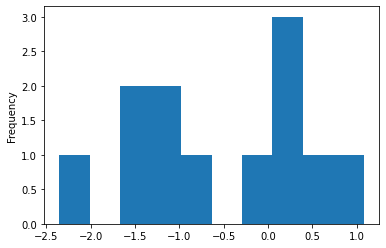

In [ ]:
df['D'].plot(kind='hist')

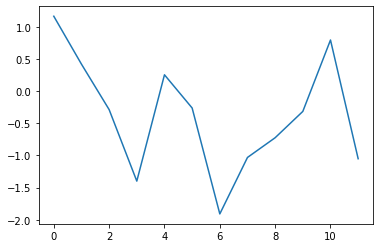

In [ ]:
# иллюстрация правил выше
# 1. По умолчанию для значений по оси x используется индекс
df['E'].plot()

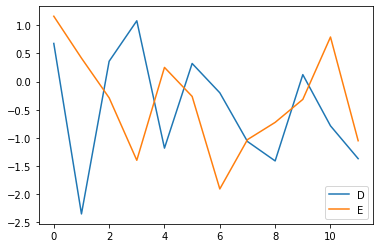

In [ ]:
df[['D','E']].plot()

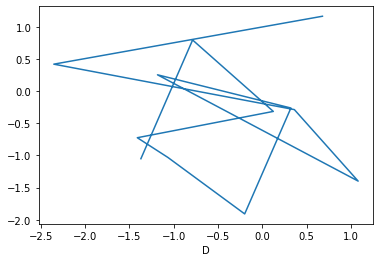

In [ ]:
df.set_index('D')['E'].plot()

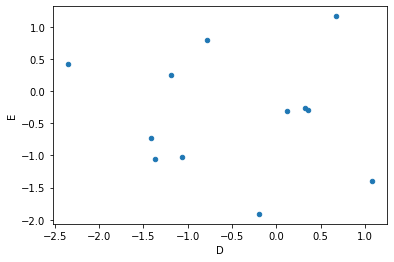

In [ ]:
df.plot.scatter(x='D', y='E')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f934520ca10>,
      dtype=object)

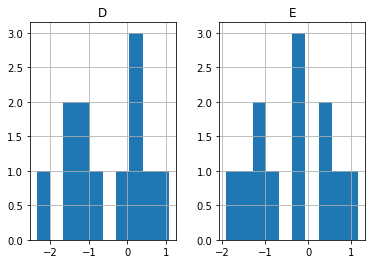

In [ ]:
# 2.По умолчанию рисует все колонки
df[['D', 'E']].hist() # .plot(kind='hist')

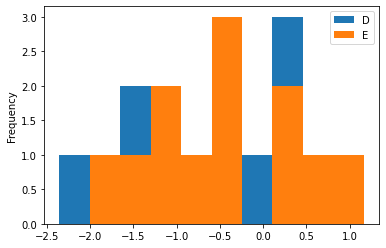

In [ ]:
df[['D', 'E']].plot(kind='hist')

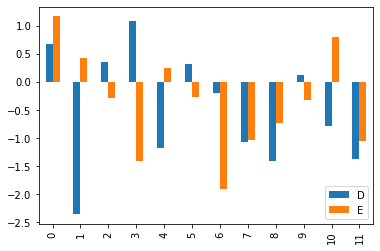

In [ ]:
df[['D', 'E']].plot(kind='bar')

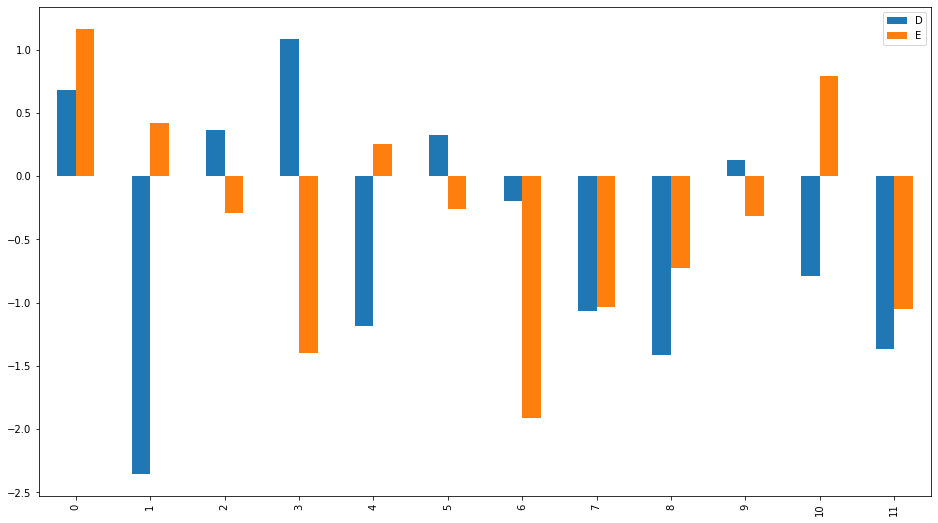

In [ ]:
# 3. можем передавать все те же параметры, что и для plt.figure
df[['D', 'E']].plot(kind='bar', figsize=(16,9))

(2,)


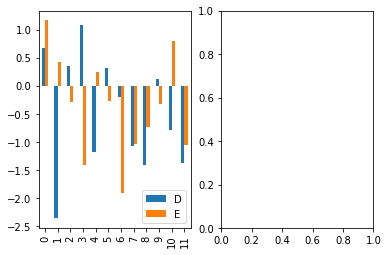

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2)
print(ax.shape)
df[['D', 'E']].plot(kind='bar', ax=ax[0])

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

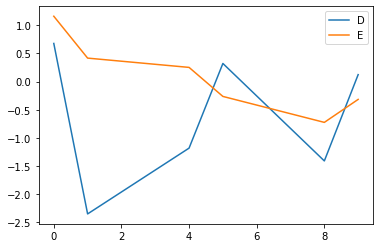

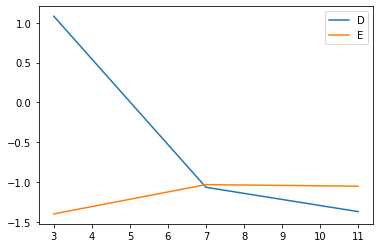

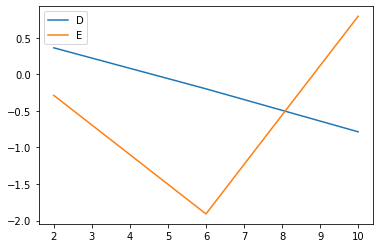

In [ ]:
from matplotlib import pyplot as plt
# 4. Можно строить графики напрямую над объектами DataFrameGroupBy, но по умолчанию графики будут строиться на разных "полотнах". 
# Чтобы нарисовать все на одном, нужно явно передавать параметр ax
df[['A', 'D', 'E']].groupby('A').plot() # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

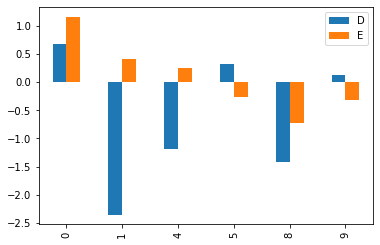

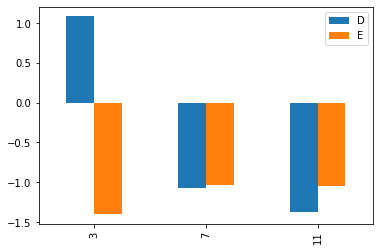

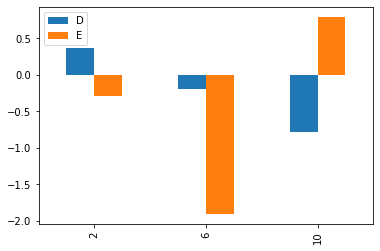

In [ ]:
df[['A', 'D', 'E']].groupby('A').plot(kind='bar') # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

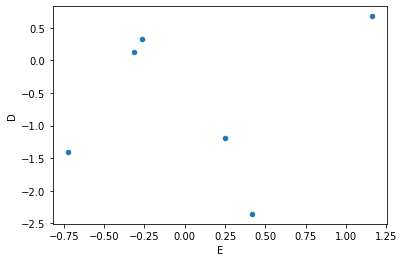

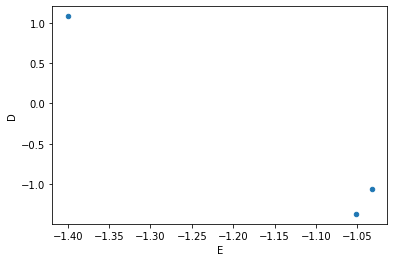

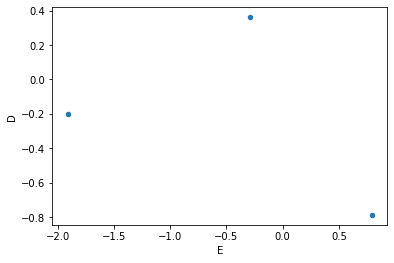

In [ ]:
df[['A', 'D', 'E']].groupby('A').plot(kind='scatter', x='E', y='D') # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

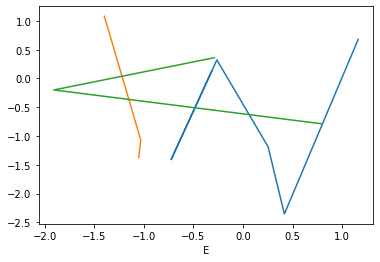

In [ ]:
fig, ax = plt.subplots()
df.groupby('A').plot(x='E', y='D', ax=ax, legend=False) # 

[Understanding pandas plot](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/)

#### Бонус
pd.cut и pd.qcut

In [ ]:
df

,A,B,C,D,E
0,one,A,foo,-0.310810,-0.554469
1,one,B,foo,0.596017,3.540851
2,two,C,foo,0.046114,0.377714
3,three,A,bar,0.350882,-0.396957
4,one,B,bar,-0.119654,-1.192011
5,one,C,bar,0.805832,-0.263356
6,two,A,foo,-0.537373,-1.095299
7,three,B,foo,-1.208103,-0.765041
8,one,C,foo,2.872742,-1.127995
9,one,A,bar,0.037781,0.092865


In [ ]:
df['interval_D'] = pd.cut(df['D'], 5)
df

,A,B,C,D,E,interval_D
0,one,A,foo,-0.310810,-0.554469,"(-0.392, 0.424]"
1,one,B,foo,0.596017,3.540851,"(0.424, 1.24]"
2,two,C,foo,0.046114,0.377714,"(-0.392, 0.424]"
3,three,A,bar,0.350882,-0.396957,"(-0.392, 0.424]"
4,one,B,bar,-0.119654,-1.192011,"(-0.392, 0.424]"
5,one,C,bar,0.805832,-0.263356,"(0.424, 1.24]"
6,two,A,foo,-0.537373,-1.095299,"(-1.212, -0.392]"
7,three,B,foo,-1.208103,-0.765041,"(-1.212, -0.392]"
8,one,C,foo,2.872742,-1.127995,"(2.057, 2.873]"
9,one,A,bar,0.037781,0.092865,"(-0.392, 0.424]"


In [ ]:
pd.cut(df['D'], 5, labels=['first', 'second', 'thrid', 'fourth', 'fifth'],)

0     second
1      thrid
2     second
3     second
4     second
5      thrid
6      first
7      first
8      fifth
9     second
10    second
11    second
Name: D, dtype: category
Categories (5, object): ['first' < 'second' < 'thrid' < 'fourth' < 'fifth']

In [ ]:
pd.qcut(df['D'], [0, 0.25, 0.5, 0.75, 1.0], labels=['q1', 'q2', 'q3', 'q4'])

0     q1
1     q4
2     q2
3     q3
4     q2
5     q4
6     q1
7     q1
8     q4
9     q2
10    q3
11    q3
Name: D, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']